Title: Regression Models

Ridge & Lasso Regression (Regularization Techniques)


Task 1: Use Ridge regression on a dataset with multicollinearity to compare results with linear regression.

In [4]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create synthetic data with multicollinearity
np.random.seed(0)
X1 = np.random.rand(100)
X2 = X1 * 0.95 + np.random.rand(100) * 0.05  # Highly correlated with X1
X3 = np.random.rand(100)
y = 3 * X1 + 2 * X2 + 4 * X3 + np.random.randn(100) * 0.1

X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha is regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Linear Regression coefficients:", lr.coef_)
print("Ridge Regression coefficients:", ridge.coef_)
print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Ridge Regression MSE: {mse_ridge:.4f}")


Linear Regression coefficients: [3.94344326 0.93857813 3.98218798]
Ridge Regression coefficients: [2.38212184 2.20278044 3.47441929]
Linear Regression MSE: 0.0117
Ridge Regression MSE: 0.0689


Task 2: Implement Lasso regression and observe effect on feature selection in feature rich data.

In [5]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with 20 features
np.random.seed(42)
n_samples, n_features = 100, 20
X = np.random.randn(n_samples, n_features)

# Only first 5 features are actually important
true_coefs = np.array([5, -3, 0, 0, 2] + [0]*(n_features-5))
y = X.dot(true_coefs) + np.random.randn(n_samples) * 0.5

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Lasso Regression
lasso = Lasso(alpha=0.1)  # alpha controls regularization strength
lasso.fit(X_train, y_train)

# Predict and calculate MSE
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Lasso coefficients:")
print(lasso.coef_)

print(f"Mean Squared Error: {mse:.4f}")

# Which features were selected (non-zero coefficients)?
selected_features = np.where(lasso.coef_ != 0)[0]
print("Selected feature indices:", selected_features)


Lasso coefficients:
[ 4.81594878 -2.87125883  0.         -0.          1.82855871  0.
 -0.          0.         -0.         -0.         -0.          0.
  0.         -0.          0.          0.          0.          0.
  0.          0.        ]
Mean Squared Error: 0.3056
Selected feature indices: [0 1 4]



Task 3: Regularization effects visualization with model complexity and performance metrics comparison.

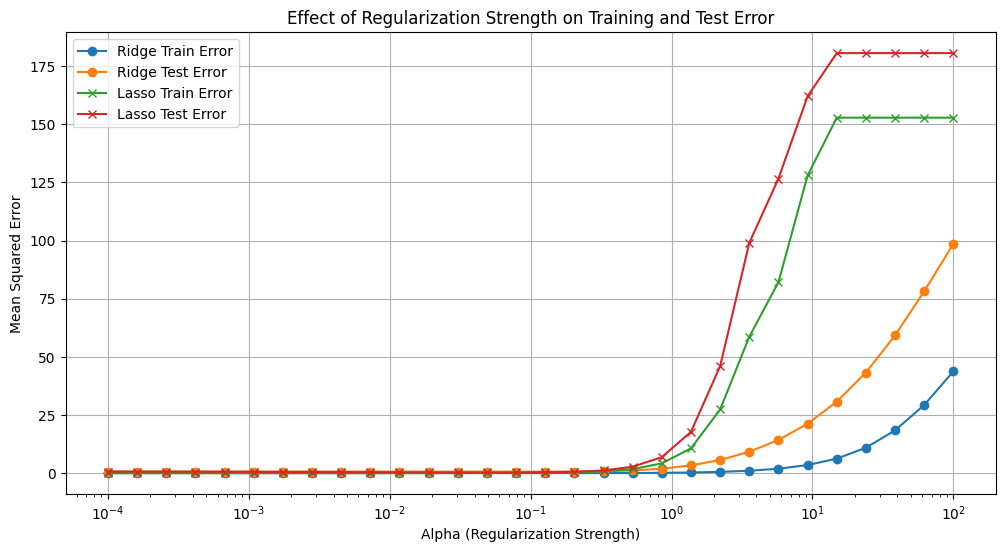

In [6]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with some noise
np.random.seed(0)
n_samples, n_features = 100, 50
X = np.random.randn(n_samples, n_features)
true_coefs = np.zeros(n_features)
true_coefs[:5] = [10, -5, 3, 0, 7]  # only first 5 features are relevant
y = X.dot(true_coefs) + np.random.randn(n_samples) * 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

alphas = np.logspace(-4, 2, 30)  # from very weak to strong regularization

ridge_train_errors = []
ridge_test_errors = []
lasso_train_errors = []
lasso_test_errors = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_train_errors.append(mean_squared_error(y_train, ridge.predict(X_train)))
    ridge_test_errors.append(mean_squared_error(y_test, ridge.predict(X_test)))
    
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_train_errors.append(mean_squared_error(y_train, lasso.predict(X_train)))
    lasso_test_errors.append(mean_squared_error(y_test, lasso.predict(X_test)))

plt.figure(figsize=(12,6))

plt.plot(alphas, ridge_train_errors, label='Ridge Train Error', marker='o')
plt.plot(alphas, ridge_test_errors, label='Ridge Test Error', marker='o')
plt.plot(alphas, lasso_train_errors, label='Lasso Train Error', marker='x')
plt.plot(alphas, lasso_test_errors, label='Lasso Test Error', marker='x')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Regularization Strength on Training and Test Error')
plt.legend()
plt.grid(True)
plt.show()
